In [3]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

In [17]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_disease_health_indicators_BRFSS2015 (1).csv')


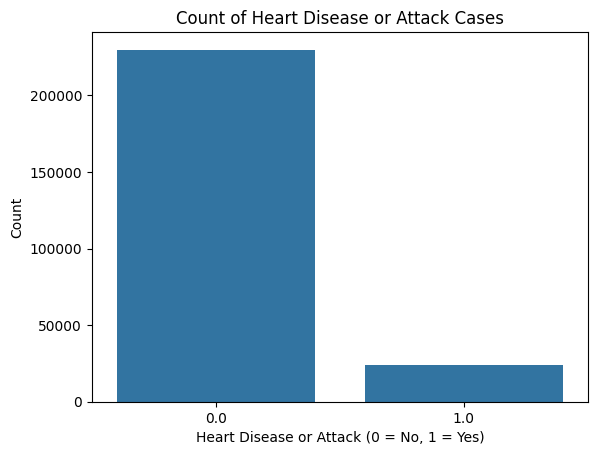

In [18]:
# Exploratory Data Analysis (EDA)
# Plotting the count of 0 and 1 in the 'HeartDiseaseorAttack' column
sns.countplot(x="HeartDiseaseorAttack", data=df)
plt.title("Count of Heart Disease or Attack Cases")
plt.xlabel("Heart Disease or Attack (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [19]:
# Separate the majority and minority classes
df_majority = df[df['HeartDiseaseorAttack'] == 0]
df_minority = df[df['HeartDiseaseorAttack'] == 1]

In [20]:
# Downsample the majority class
from sklearn.utils import resample
df_majority_downsampled = resample(df_majority,
                                    replace=False,    # sample without replacement
                                    n_samples=len(df_minority), # match number in minority class
                                    random_state=42)  # reproducible results

In [21]:
# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

In [22]:
# Split features and target
X = df_balanced.drop('HeartDiseaseorAttack', axis=1)
y = df_balanced['HeartDiseaseorAttack']

In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# ANN Model
ann_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=200, random_state=42)
ann_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50,), random_state=42)

In [26]:
# ANN Predictions
y_pred_ann = ann_model.predict(X_test)


In [27]:
# ANN Classification Report
print("ANN Classification Report:")
print(classification_report(y_test, y_pred_ann))

ANN Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.74      0.76      4740
         1.0       0.76      0.80      0.78      4818

    accuracy                           0.77      9558
   macro avg       0.77      0.77      0.77      9558
weighted avg       0.77      0.77      0.77      9558



In [28]:

# ANN Precision-Recall Curve
y_scores_ann = ann_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores_ann)
auc_ann = auc(recall, precision)

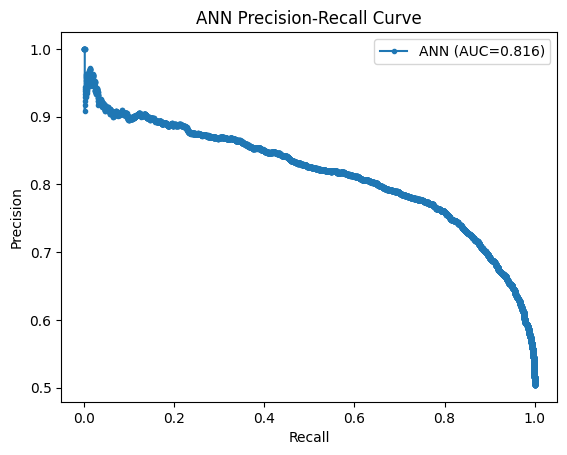

In [29]:
# Plot ANN Precision-Recall Curve
plt.plot(recall, precision, marker='.', label=f'ANN (AUC={auc_ann:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('ANN Precision-Recall Curve')
plt.legend()
plt.show()